In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14851555450727914682, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7923320006977297112
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

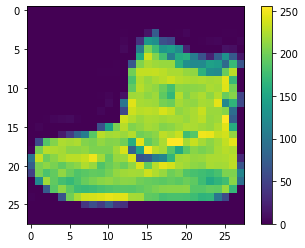

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0 # 범위를 0~1 사이로 조정함
test_images = test_images / 255.0

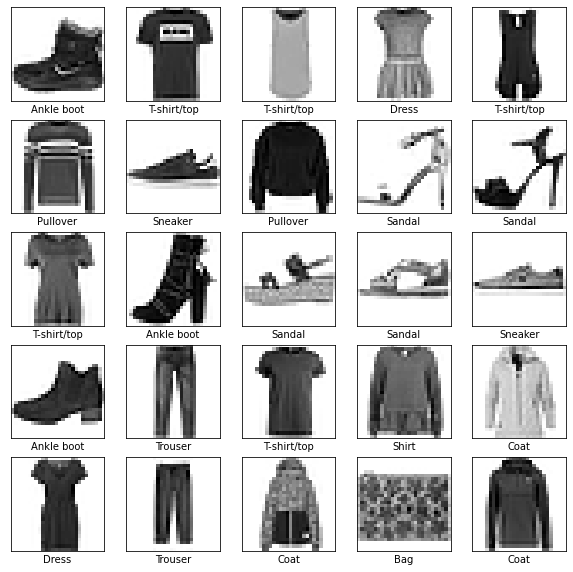

In [14]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), # 2차원 배열의 이미지 포맷을 784픽셀의 1차원 배열로 변환
                          keras.layers.Dense(128, activation='relu'), # 128개의 노드
                          keras.layers.Dense(10, activation='softmax') # 10개의 노드, 반환된 값의 전체 합 : 1 -> 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력함
])

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4964 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.8924


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3579 - accuracy: 0.8656

테스트 정확도: 0.8655999898910522


In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([2.0851144e-07, 1.9942757e-08, 1.9193827e-09, 1.8772497e-09,
       1.6330912e-08, 1.3470494e-03, 1.7359324e-07, 2.9145617e-03,
       1.0474355e-06, 9.9573684e-01], dtype=float32)

In [22]:
np.argmax(predictions[0]) # 가장 높은 신뢰도를 가진 레이블 - 9번 레이블이 답이 될 확률이 제일 높음

9

In [23]:
test_labels[0] # 정답 : 9번

9

In [24]:
def plot_image(i, predictions_array, true_label, img): # 10개 클래스에 대한 예측을 그래프로 그리기
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

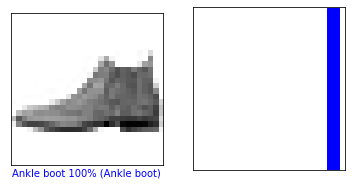

In [25]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

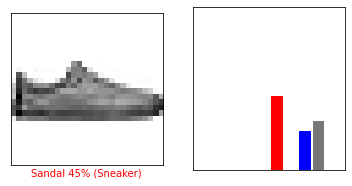

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

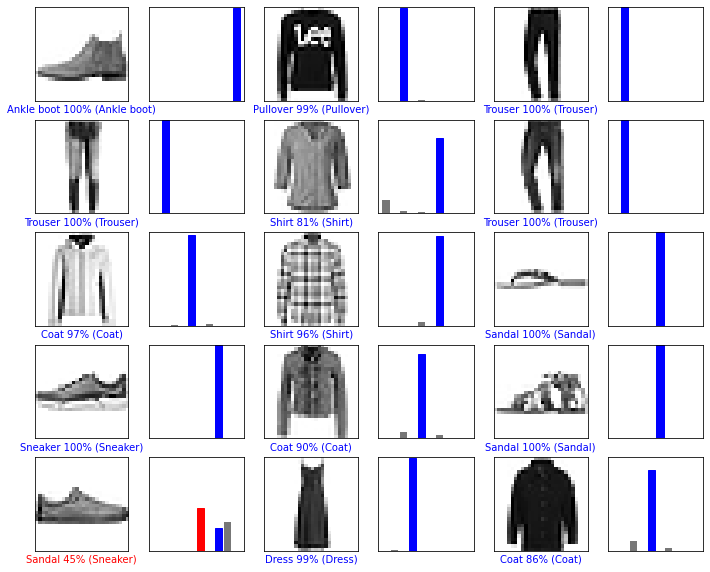

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [28]:
img = test_images[0]
print(img.shape)

(28, 28)


In [29]:
img = (np.expand_dims(img, 0)) # keras -> 하나의 이미지를 사용할 때도 2차원 배열로 만들어야 함
print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.0851144e-07 1.9942757e-08 1.9193900e-09 1.8772532e-09 1.6330912e-08
  1.3470494e-03 1.7359356e-07 2.9145631e-03 1.0474384e-06 9.9573684e-01]]


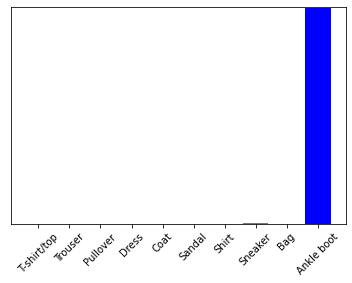

In [32]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(predictions_single[0])

9